Epoch 1/50
756/756 [==============================] - 4s 4ms/step - loss: 0.2335 - accuracy: 0.9212 - val_loss: 0.1829 - val_accuracy: 0.9386
Epoch 2/50
756/756 [==============================] - 2s 3ms/step - loss: 0.1889 - accuracy: 0.9383 - val_loss: 0.1812 - val_accuracy: 0.9402
Epoch 3/50
756/756 [==============================] - 2s 3ms/step - loss: 0.1866 - accuracy: 0.9366 - val_loss: 0.1815 - val_accuracy: 0.9402
Epoch 4/50
756/756 [==============================] - 2s 3ms/step - loss: 0.1852 - accuracy: 0.9363 - val_loss: 0.1737 - val_accuracy: 0.9407
Epoch 5/50
756/756 [==============================] - 2s 3ms/step - loss: 0.1819 - accuracy: 0.9351 - val_loss: 0.1741 - val_accuracy: 0.9412
Epoch 6/50
756/756 [==============================] - 2s 2ms/step - loss: 0.1801 - accuracy: 0.9383 - val_loss: 0.1715 - val_accuracy: 0.9381
Epoch 7/50
756/756 [==============================] - 2s 2ms/step - loss: 0.1787 - accuracy: 0.9377 - val_loss: 0.1702 - val_accuracy: 0.9397
Epoch 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


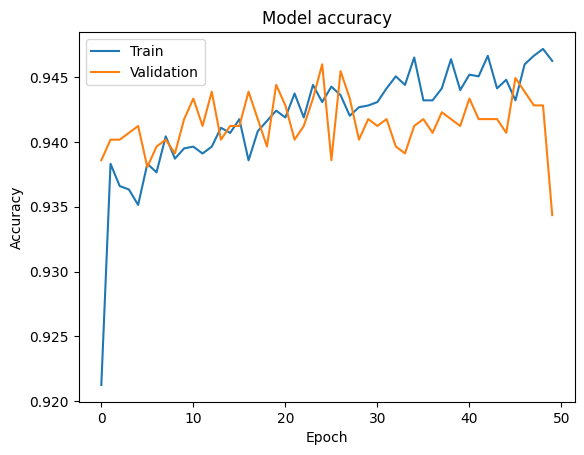

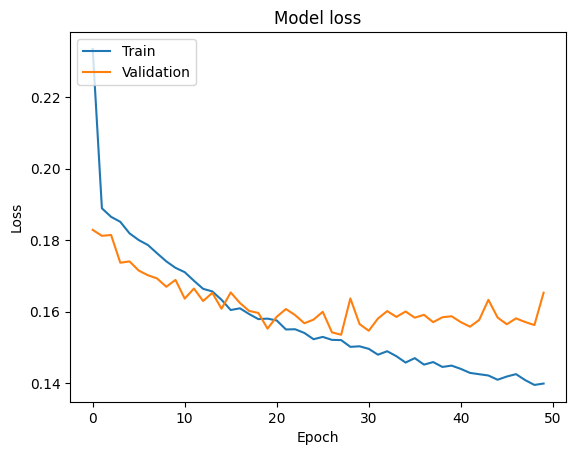

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the data
data = pd.read_csv('/content/sample_data/Ecom_Cust_Survey.csv')

# Display the first few rows of the dataset
data.head()

# Handle missing values
data = data.dropna()

# Encode categorical variables
label_encoder = LabelEncoder()
data['Region'] = label_encoder.fit_transform(data['Region'])
data['Customer_Type'] = label_encoder.fit_transform(data['Customer_Type'])
data['Improvement Area'] = label_encoder.fit_transform(data['Improvement Area'])
data['Overall_Satisfaction'] = label_encoder.fit_transform(data['Overall_Satisfaction'])

# Define features and target variable
X = data.drop(['Overall_Satisfaction'], axis=1)
y = data['Overall_Satisfaction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Save the model
model.save('ecom_customer_satisfaction_model.h5')

# Plot training & validation accuracy values
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Let's break down the code step by step:

### Import Necessary Libraries
```python
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
```
- **pandas**: Used for data manipulation and analysis.
- **numpy**: Used for numerical operations.
- **tensorflow**: A deep learning framework.
- **sklearn.model_selection.train_test_split**: Used to split the dataset into training and testing sets.
- **sklearn.preprocessing.StandardScaler**: Used to standardize features by removing the mean and scaling to unit variance.
- **sklearn.preprocessing.LabelEncoder**: Used to encode categorical variables into numerical values.
- **tensorflow.keras.models.Sequential**: Used to create a linear stack of layers for the neural network.
- **tensorflow.keras.layers.Dense**: Used to create fully connected layers in the neural network.

### Load the Data
```python
data = pd.read_csv('Ecom_Cust_Survey.csv')
```
- Loads the dataset from a CSV file into a pandas DataFrame.

### Display the First Few Rows of the Dataset
```python
data.head()
```
- Displays the first few rows of the dataset to get an overview of the data.

### Handle Missing Values
```python
data = data.dropna()
```
- Removes any rows with missing values from the dataset.

### Encode Categorical Variables
```python
label_encoder = LabelEncoder()
data['Region'] = label_encoder.fit_transform(data['Region'])
data['Customer_Type'] = label_encoder.fit_transform(data['Customer_Type'])
data['Improvement Area'] = label_encoder.fit_transform(data['Improvement Area'])
data['Overall_Satisfaction'] = label_encoder.fit_transform(data['Overall_Satisfaction'])
```
- Converts categorical variables into numerical values using LabelEncoder.

### Define Features and Target Variable
```python
X = data.drop(['Overall_Satisfaction'], axis=1)
y = data['Overall_Satisfaction']
```
- **X**: Features (all columns except 'Overall_Satisfaction').
- **y**: Target variable ('Overall_Satisfaction').

### Split the Data into Training and Testing Sets
```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```
- Splits the data into training (80%) and testing (20%) sets.

### Normalize the Data
```python
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
```
- Standardizes the features by removing the mean and scaling to unit variance.

### Build the Neural Network Model
```python
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
```
- **Sequential**: Initializes a linear stack of layers.
- **Dense(64, input_dim=X_train.shape[1], activation='relu')**: Adds a fully connected layer with 64 neurons, ReLU activation, and input dimension equal to the number of features.
- **Dense(32, activation='relu')**: Adds another fully connected layer with 32 neurons and ReLU activation.
- **Dense(1, activation='sigmoid')**: Adds an output layer with 1 neuron and sigmoid activation (suitable for binary classification).

### Compile the Model
```python
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
```
- **loss='binary_crossentropy'**: Specifies the loss function for binary classification.
- **optimizer='adam'**: Specifies the optimizer for training.
- **metrics=['accuracy']**: Specifies the metric to evaluate the model.

### Train the Model
```python
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)
```
- **epochs=50**: Number of times the entire dataset is passed through the network.
- **batch_size=10**: Number of samples per gradient update.
- **validation_split=0.2**: Fraction of the training data to be used as validation data.

### Evaluate the Model
```python
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')
```
- Evaluates the model on the test data and prints the accuracy.

### Save the Model
```python
model.save('ecom_customer_satisfaction_model.h5')
```
- Saves the trained model to a file.

### Plot Training & Validation Accuracy Values
```python
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
```
- Plots the training and validation accuracy over epochs.

### Plot Training & Validation Loss Values
```python
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
```
- Plots the training and validation loss over epochs.

This code provides a comprehensive workflow for building, training, evaluating, and saving a neural network model using TensorFlow and Keras. It also includes data preprocessing steps such as handling missing values, encoding categorical variables, and normalizing the data.

Test Accuracy: 93.56%


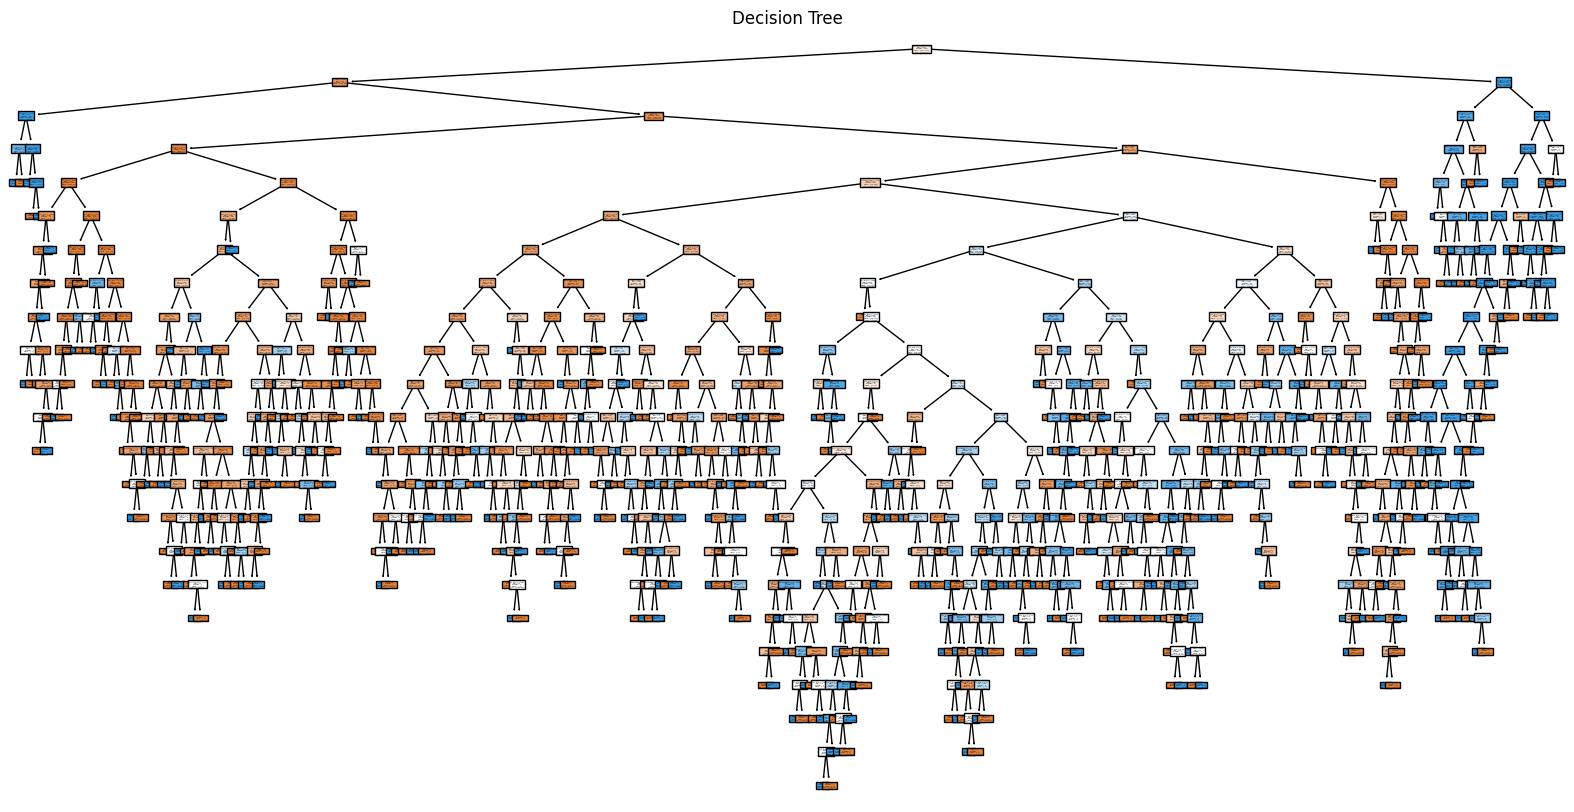

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/content/sample_data/Ecom_Cust_Survey.csv')

# Display the first few rows of the dataset
data.head()

# Handle missing values
data = data.dropna()

# Encode categorical variables
label_encoder = LabelEncoder()
data['Region'] = label_encoder.fit_transform(data['Region'])
data['Customer_Type'] = label_encoder.fit_transform(data['Customer_Type'])
data['Improvement Area'] = label_encoder.fit_transform(data['Improvement Area'])
data['Overall_Satisfaction'] = label_encoder.fit_transform(data['Overall_Satisfaction'])

# Define features and target variable
X = data.drop(['Overall_Satisfaction'], axis=1)
y = data['Overall_Satisfaction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the decision tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Evaluate the model
accuracy = decision_tree.score(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Visualize the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(decision_tree, feature_names=X.columns, class_names=label_encoder.classes_, filled=True)
plt.title('Decision Tree')
plt.show()

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz

# Load the data
data = pd.read_csv('/content/sample_data/Ecom_Cust_Survey.csv')

# Handle missing values
data = data.dropna()

# Encode categorical variables
label_encoder = LabelEncoder()
data['Region'] = label_encoder.fit_transform(data['Region'])
data['Customer_Type'] = label_encoder.fit_transform(data['Customer_Type'])
data['Improvement Area'] = label_encoder.fit_transform(data['Improvement Area'])
data['Overall_Satisfaction'] = label_encoder.fit_transform(data['Overall_Satisfaction'])

# Define features and target variable
X = data.drop(['Overall_Satisfaction'], axis=1)
y = data['Overall_Satisfaction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Export the decision tree to a dot file
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=X.columns,
                                class_names=label_encoder.classes_,
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)

# Save the decision tree as a PDF
graph.render("decision_tree", format='pdf')

print("Decision tree saved as decision_tree.pdf")

Decision tree saved as decision_tree.pdf
